**Nombre: Arturo Garza Campuzano**

**Matrícula: A00828096**

# Técnicas de procesamiento de datos para el análisis estadístico y para la construcción de modelos

Una empresa automovilística china aspira a entrar en el mercado estadounidense. Desea establecer allí una unidad de fabricación y producir automóviles localmente para competir con sus contrapartes estadounidenses y europeas. Contrataron una empresa de consultoría de automóviles para identificar los principales factores de los que depende el precio de los automóviles, específicamente, en el mercado estadounidense, ya que pueden ser muy diferentes del mercado chino. Esencialmente, la empresa quiere saber:

- Qué variables son significativas para predecir el precio de un automóvil
- Qué tan bien describen esas variables el precio de un automóvil

In [84]:
# Importación de librerías
import pandas as pd
import numpy as np
import random as rnd
import math

import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [85]:
# Dataframe del conjunto de datos
autos_df = pd.read_csv('sample_data/precios_autos.csv')
autos_df.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginetype,cylindernumber,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


## **1. Exploración de la base de datos**

### 1.1 Cálculo de mediads estadísticas

#### 1.1.1 Variables cuantitativas

Las variables cuantitativas en este contexto son todas aquellas variables que están catalogadas como **numéricas**. Se utiliza la función **describe** para visualizar, por cada variable, la cantidad de valores, la media, la desviación estándar, los cuantiles, el mínimo y el máximo valor. Estas variables se guardan en un dataframe para facilitar su manipulación.

Nota: Se excluye la variable symboling debido a que está catalogada como variable categórica.

In [86]:
variables_cuantitativas = autos_df.select_dtypes(include=['number'])
variables_cuantitativas.drop(columns=['symboling'], inplace=True)
variables_cuantitativas.describe()


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### 1.1.2 Variables cualitativas

Las variables calitativas para esta problemática son todas aquellas variables que están catalogadas en el diccionario del conjunto de datos como **categóricas**. Conviene eliminar la variables CarName debido a la alta cantidad de posibles valores únicos. Se utiliza el método **describe** sobre el dataframe para identificar la cantidad de valores por variable, la cantidad valores posibles para cada una de ellas, el primer valor de la variable y su respectiva frecuencia. Estas variables se guardan en un dataframe para facilitar su manipulación.

**Nota:** La varibale symboling se incluirá más adelante al conjunto de vairbales cualitativas de acuerdo al diccionario del conjunto de datos. Primero es necesario transformar los datos a valores numéricos para facilitar su análisis.

In [87]:
# Dataframe de variables cualitativas
variables_cualitativas = autos_df.select_dtypes(include=['object'])
variables_cualitativas.drop(columns=['CarName'], inplace=True)
vcual_df = variables_cualitativas.describe(include=['O'])

symboling_count = autos_df['symboling'].count()
symboling_unique = autos_df['symboling'].nunique()
symboling_top = autos_df['symboling'][0]
symboling_freq = autos_df['symboling'].value_counts()[symboling_top]

vcual_df['symboling'] = [symboling_count, symboling_unique, symboling_top, symboling_freq]
vcual_df

,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber,symboling
count,205,205,205,205,205,205,205
unique,2,5,3,2,7,7,6
top,gas,sedan,fwd,front,ohc,four,3
freq,185,96,120,202,148,159,27


Se **transforman** los valores de las variables categóricas a valores numéricos para facilitar su lectura y análisis. Esta transformación se realiza sobre el dataframe de variables cualitativas obtenido en el paso anterior.

**Nota:** Se guarda en un dataframe la información del mapeo realizado para posterior interpretación de los datos.

In [88]:
# Crear un nuevo dataframe para guardar la información de mapeo
mapping_df = pd.DataFrame(columns=['Column', 'Original_Value', 'Mapped_Value'])

# Crea diccionario de columnas mapeadas
column_mappings = {}

# Itera sobre cada columna
for column in variables_cualitativas.columns:
    unique_values = variables_cualitativas[column].unique()
    mapping = {value: index + 1 for index, value in enumerate(unique_values)}
    column_mappings[column] = mapping

    # Guarda la información de mapeo en un dataframe
    mapping_df = pd.concat([mapping_df, pd.DataFrame({'Column': [column] * len(mapping), 'Original_Value': mapping.keys(), 'Mapped_Value': mapping.values()})], ignore_index=True)

# Aplicar los mapeos al dataframe
for column, mapping in column_mappings.items():
    variables_cualitativas[column] = variables_cualitativas[column].replace(mapping)

# variables_cualitativas = autos_df[['fueltype', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'symboling']]
variables_cualitativas = variables_cualitativas = variables_cualitativas.join(autos_df['symboling'])
variables_cualitativas.head()

,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber,symboling
0,1,1,1,1,1,1,3
1,1,1,1,1,1,1,3
2,1,2,1,1,2,2,1
3,1,3,2,1,3,1,2
4,1,3,3,1,3,3,2


### 1.2 Exploración de datos usando herramientas de visualización

#### 1.2.1 Vairbales cuantitativas

##### 1.2.1.1 Medidas de posición
Por cada variable cuantitativa se obtienen los cuartiles, se identifican los datos atípicos y se hace un diagrama de caja y bigotes.

In [89]:
# Calcula los cuartiles (25%, 50% y 75%)
cuartiles = variables_cuantitativas.quantile([0.25, 0.5, 0.75])

# Calcula el rango intercuartilico (IQR)
iqr = cuartiles.loc[0.75] - cuartiles.loc[0.25]

# Define los límites para detectar valores atípicos (outliers)
lower_bound = cuartiles.loc[0.25] - 1.5 * iqr
upper_bound = cuartiles.loc[0.75] + 1.5 * iqr

# Identifica los valores atípicos
outliers = ((variables_cuantitativas < lower_bound) | (variables_cuantitativas > upper_bound))

# Calcula la cantidad de valores atípicos por columna
outliers_count = outliers.sum()
outliers_count

wheelbase            3
carlength            1
carwidth             8
carheight            0
curbweight           0
enginesize          10
stroke              20
compressionratio    28
horsepower           6
peakrpm              2
citympg              2
highwaympg           3
price               15
dtype: int64

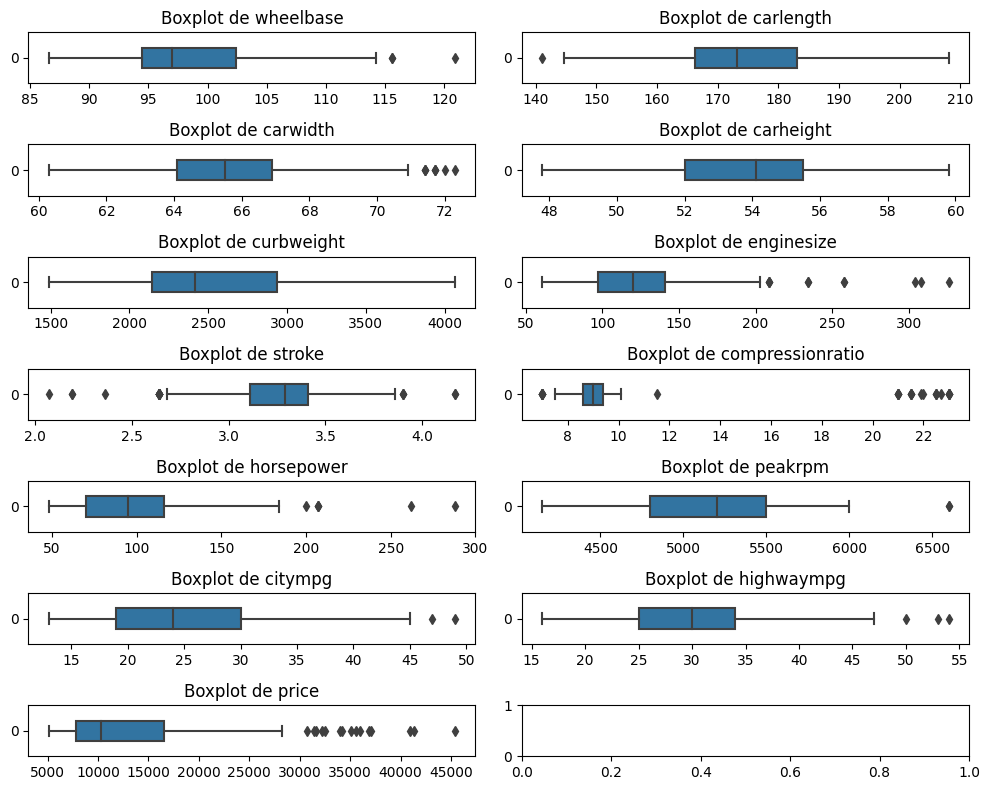

In [90]:
# Crear una figura y matriz de subtramas
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 8))

# Iterar sobre las subtramas y las columnas
for ax, column in zip(axes.flatten(), variables_cuantitativas):
    sns.boxplot(data=autos_df[column], orient="h", width=0.4, ax=ax)
    ax.set_title(f"Boxplot de {column}")

# Ajustar diseño de subtramas y mostrar figura
plt.tight_layout()
plt.show()

##### 1.2.1.2 Análisis de distribución de los datos

Se crea un histograma por cada vairable cuantitativa para visualizar la frecuencia de sus respectivos valores. También se calcula la mediana, media y moda de cada variable para averiguar la forma de la distribución. Observando los histogramas resultantes y la diferencia entre la mediana, media y moda de cada variable se identifica la forma de la distribución de cada vairable en la siguiente tabla:

| Variable         | Distribución |
|------------------|--------------|
| wheelbase        | Asimétrica   |
| carlength        | Simétrica    |
| carwidth         | Simétrica    |
| carheight        | Simétrica    |
| curbweight       | Asimétrica   |
| enginesize       | Asimétrica   |
| stroke           | Simétrica    |
| compressionratio | Asimétrica   |
| horsepower       | Asimétrica   |
| peakrpm          | Simétrica    |
| citympg          | Simétrica    |
| highwaympg       | Simétrica    |
| price            | Asimétrica   |


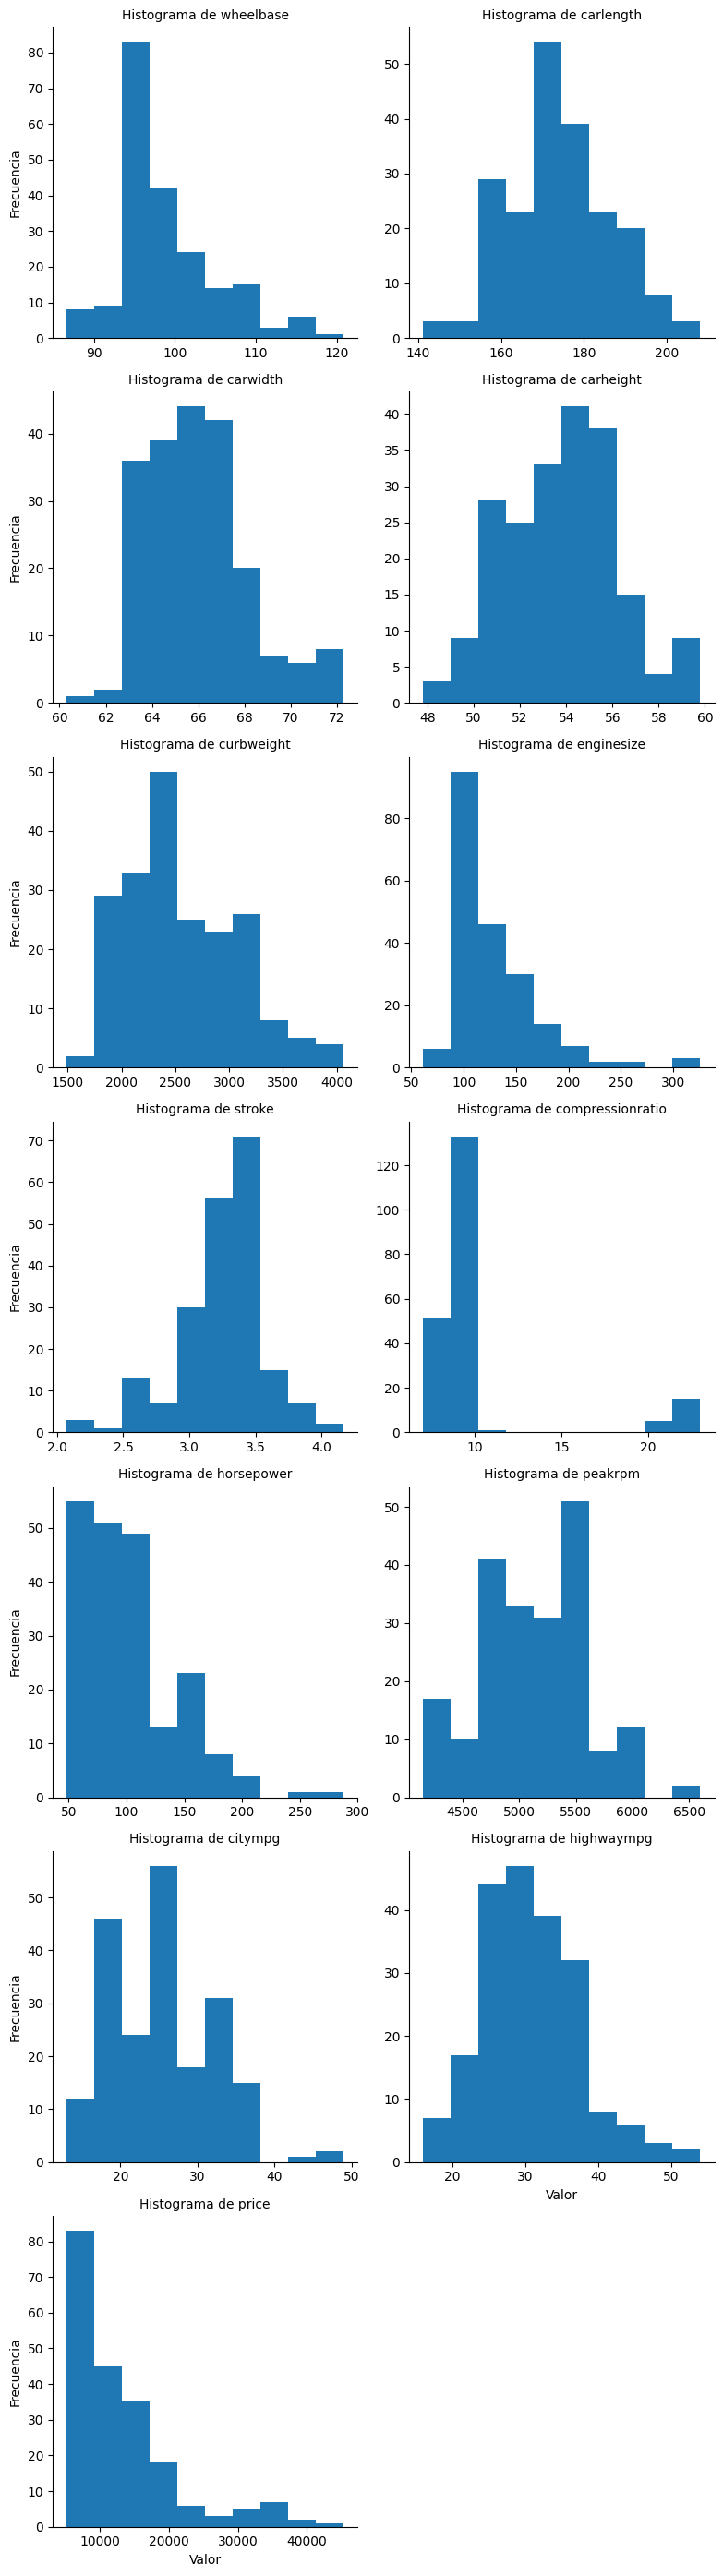

In [91]:
# Crear un FacetGrid para histogramas
g = sns.FacetGrid(variables_cuantitativas.melt(), col="variable", col_wrap=2, sharex=False, sharey=False, height=4)

# Map histograms to the FacetGrid
# Mapear histogramas al FacetGrid
g.map(plt.hist, "value", bins=10)
g.set_titles(col_template="Histograma de {col_name}")
g.set_axis_labels("Valor", "Frecuencia")

# Ajustar layout y mostrar gráficas
plt.tight_layout()
plt.show()

In [92]:
# Calcular la media, mediana y moda de cada columna
result_dict = {'Variable': [], 'Media': [], 'Mediana': [], 'Moda': []}

for column in variables_cuantitativas.columns:
    mean_val = variables_cuantitativas[column].mean()
    median_val = variables_cuantitativas[column].median()
    mode_val = variables_cuantitativas[column].mode().values[0]  # Tomar el primer valor de la moda

    result_dict['Variable'].append(column)
    result_dict['Media'].append(mean_val)
    result_dict['Mediana'].append(median_val)
    result_dict['Moda'].append(mode_val)

# Crear un nuevo DataFrame con los resultados
result_df = pd.DataFrame(result_dict)

# Imprimir el nuevo DataFrame
result_df


,Variable,Media,Mediana,Moda
0,wheelbase,98.756585,97.00,94.5
1,carlength,174.049268,173.20,157.3
2,carwidth,65.907805,65.50,63.8
3,carheight,53.724878,54.10,50.8
4,curbweight,2555.565854,2414.00,2385.0
5,enginesize,126.907317,120.00,92.0
6,stroke,3.255415,3.29,3.4
7,compressionratio,10.142537,9.00,9.0
8,horsepower,104.117073,95.00,68.0
9,peakrpm,5125.121951,5200.00,5500.0


##### 1.2.1.3 Análisis de colinealidad
De acuerdo con el mapa de calor, las variables cuantitativas que están más correlacionadas con el precio son las siguientes:
- enginesize: 0.87
- curbweight: 0.84
- horsepower: 0.81
- carwidth: 0.76
- highwaympg: 0.70
- citympg: -0.69

Se observa en los diagramas de dispersión que los datos de estas variables están agrupados y tienen una forma definida, lo cual indica que se tiene una fuerte correlación con la variable de precio.


<ipython-input-93-ef6e3cb5c557>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = autos_df.corr()
<ipython-input-93-ef6e3cb5c557>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr_matrix, dtype=np.bool),


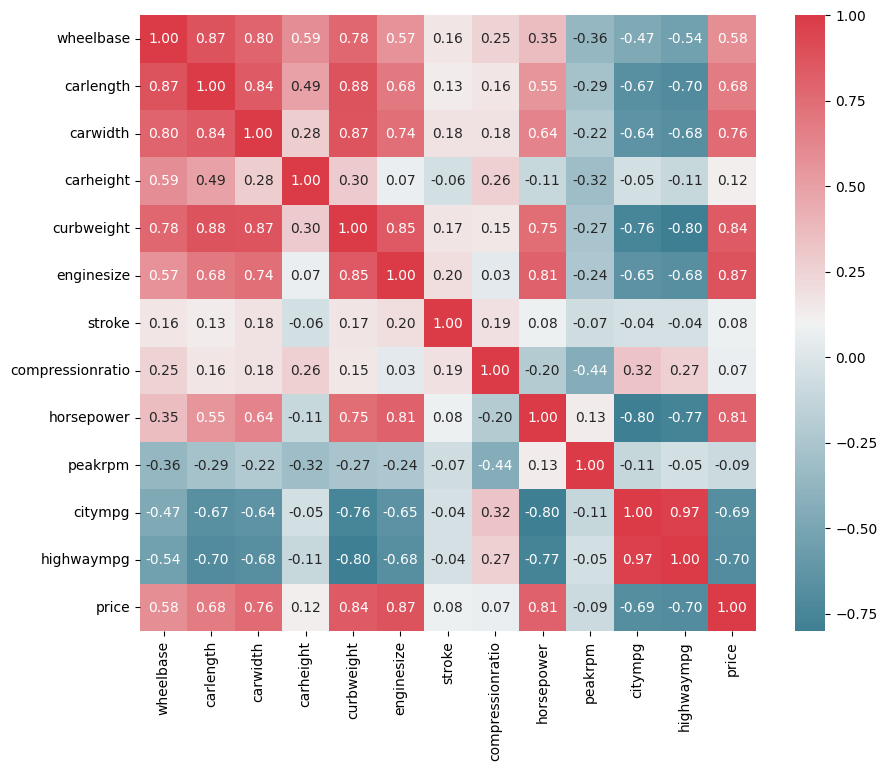

In [93]:
# Coeficiente de correlación
heatmap_data = variables_cuantitativas
corr_matrix = heatmap_data.corr()

f, ax = plt.subplots(figsize=(10, 8))
corr = autos_df.corr()

sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            mask=np.zeros_like(corr_matrix, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

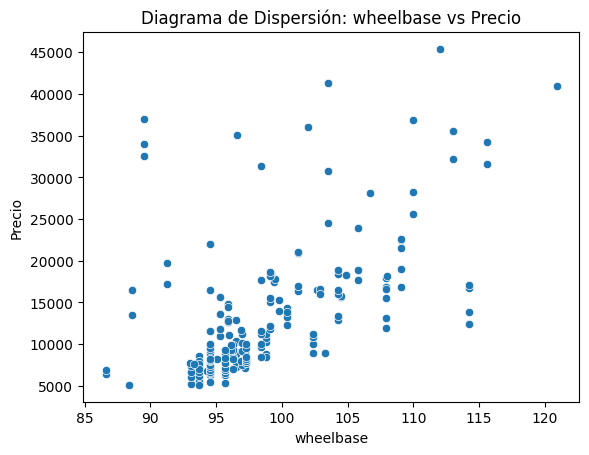

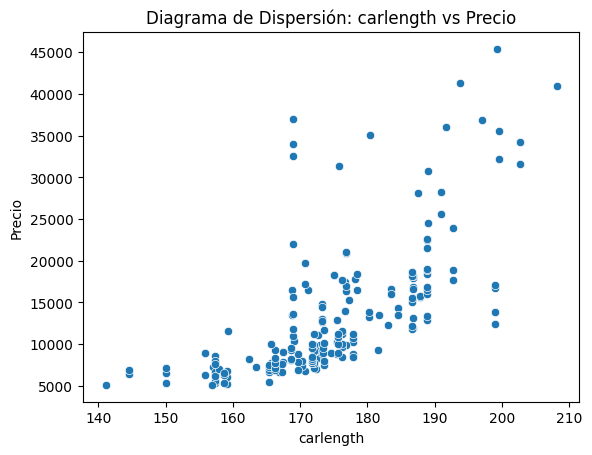

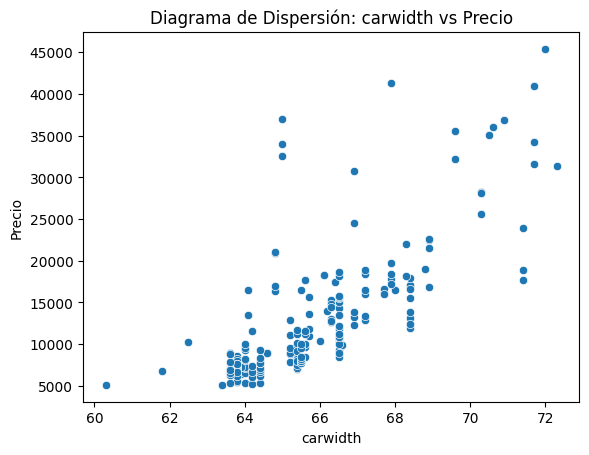

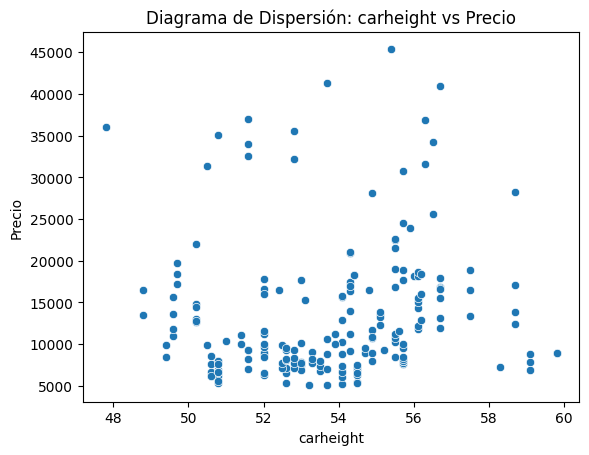

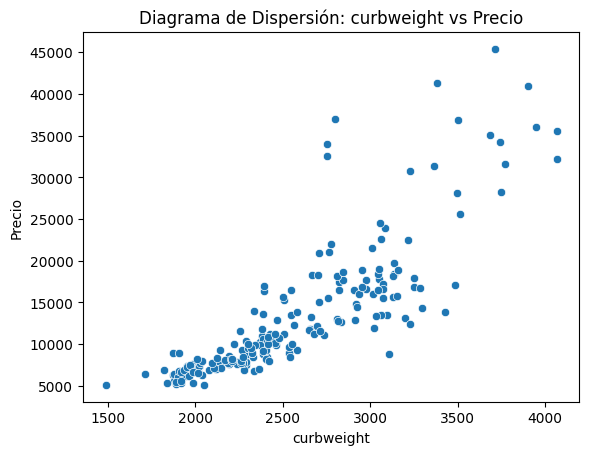

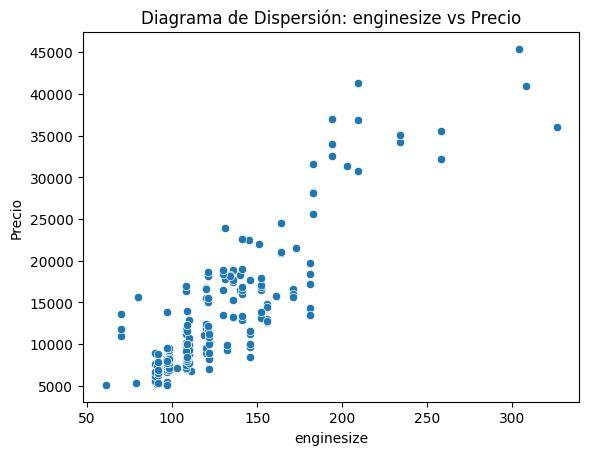

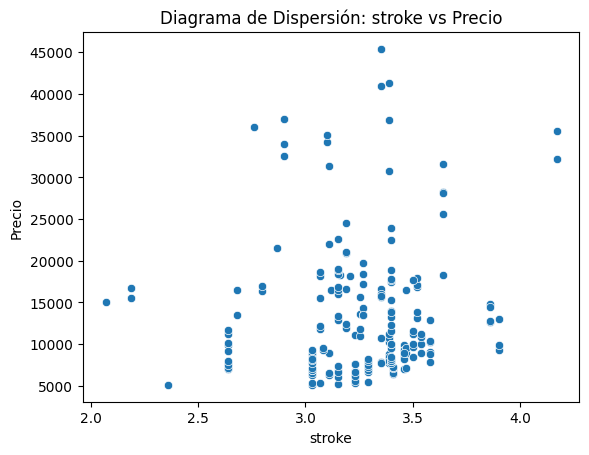

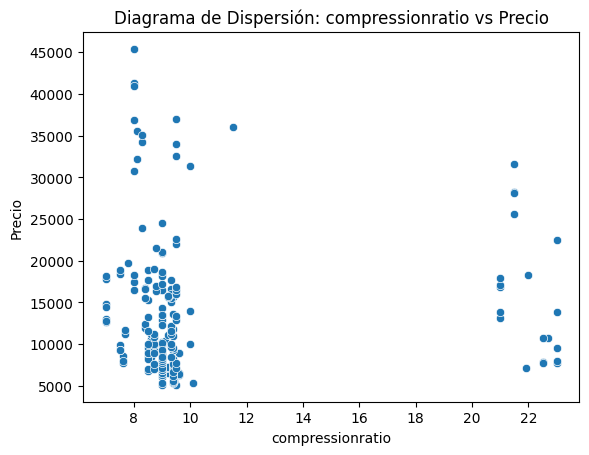

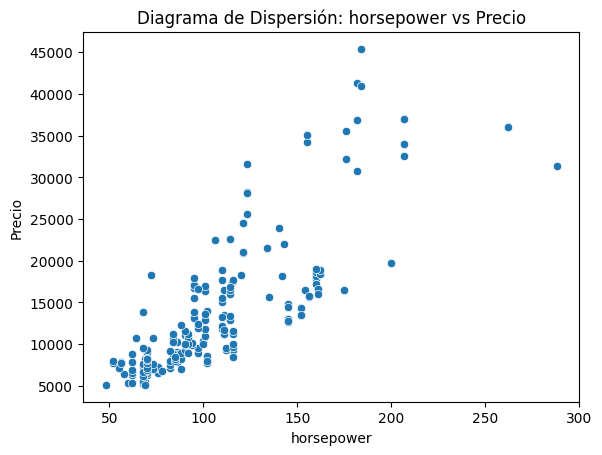

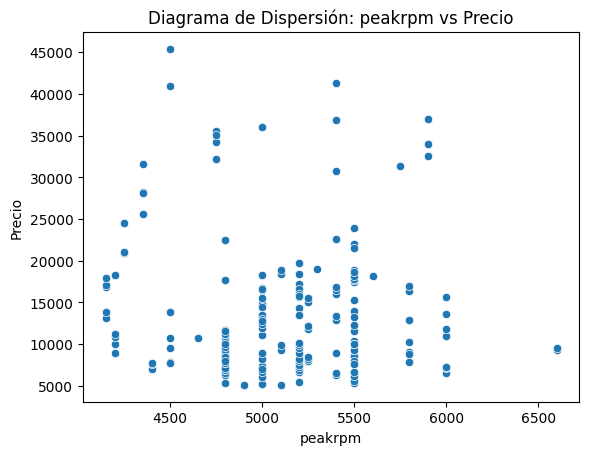

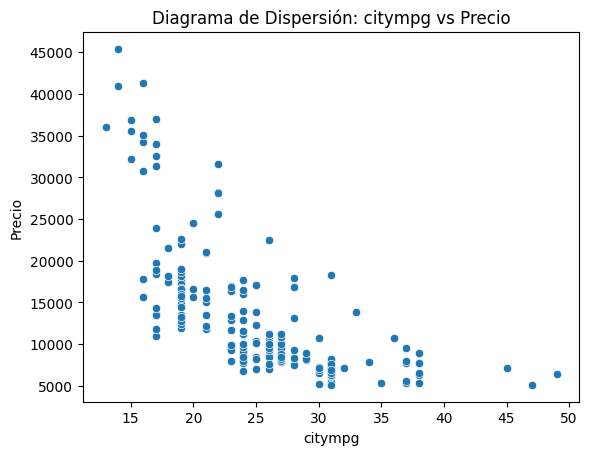

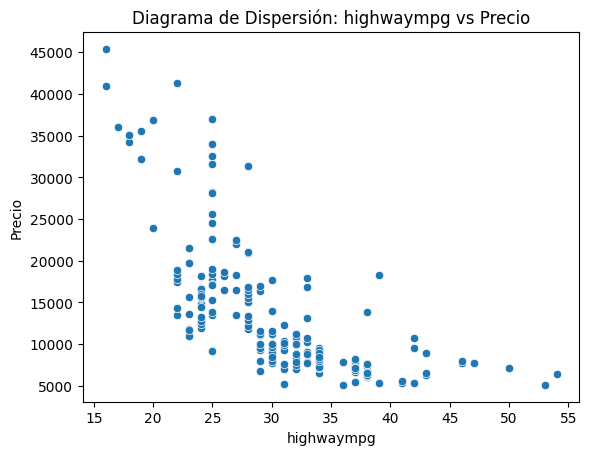

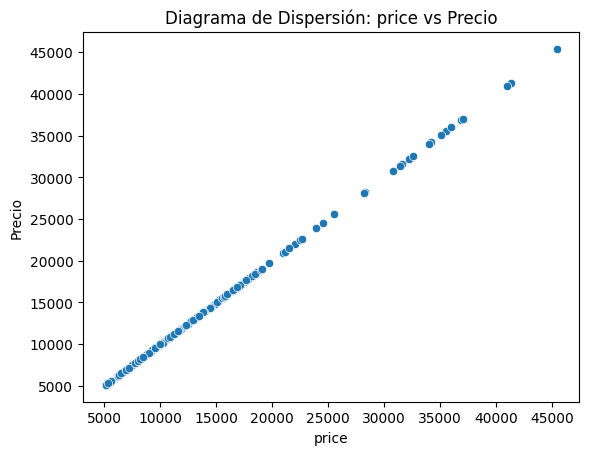

In [94]:
# Diagramas de dispersión
for columna in variables_cuantitativas:
    sns.scatterplot(data=autos_df, x=columna, y='price')
    plt.title(f'Diagrama de Dispersión: {columna} vs Precio')
    plt.xlabel(columna)
    plt.ylabel('Precio')
    plt.show()

#### 1.2.2 Variables categóricas

##### 1.2.2.1 Distribución de los datos

En el caso de las variables cualitativas que tienen cinco o más valores posibles es interesante observar que casi todas las gráficas siguen un tipo de distribución:

| Variable       | Distribución |
|----------------|--------------|
| carbody        | Simétrica    |
| cylindernumber | Asimétrica   |
| symboling      | Simétrica    |

Por otro lado, también se puede contemplar que hay un desbalance de los valores posibles en las siguientes variables cualitativas: fuletype, enginelocation, enginetype. Para relacionar el valor numérico actual para cada variable con su valor original se presenta un dataframe del mapeo.



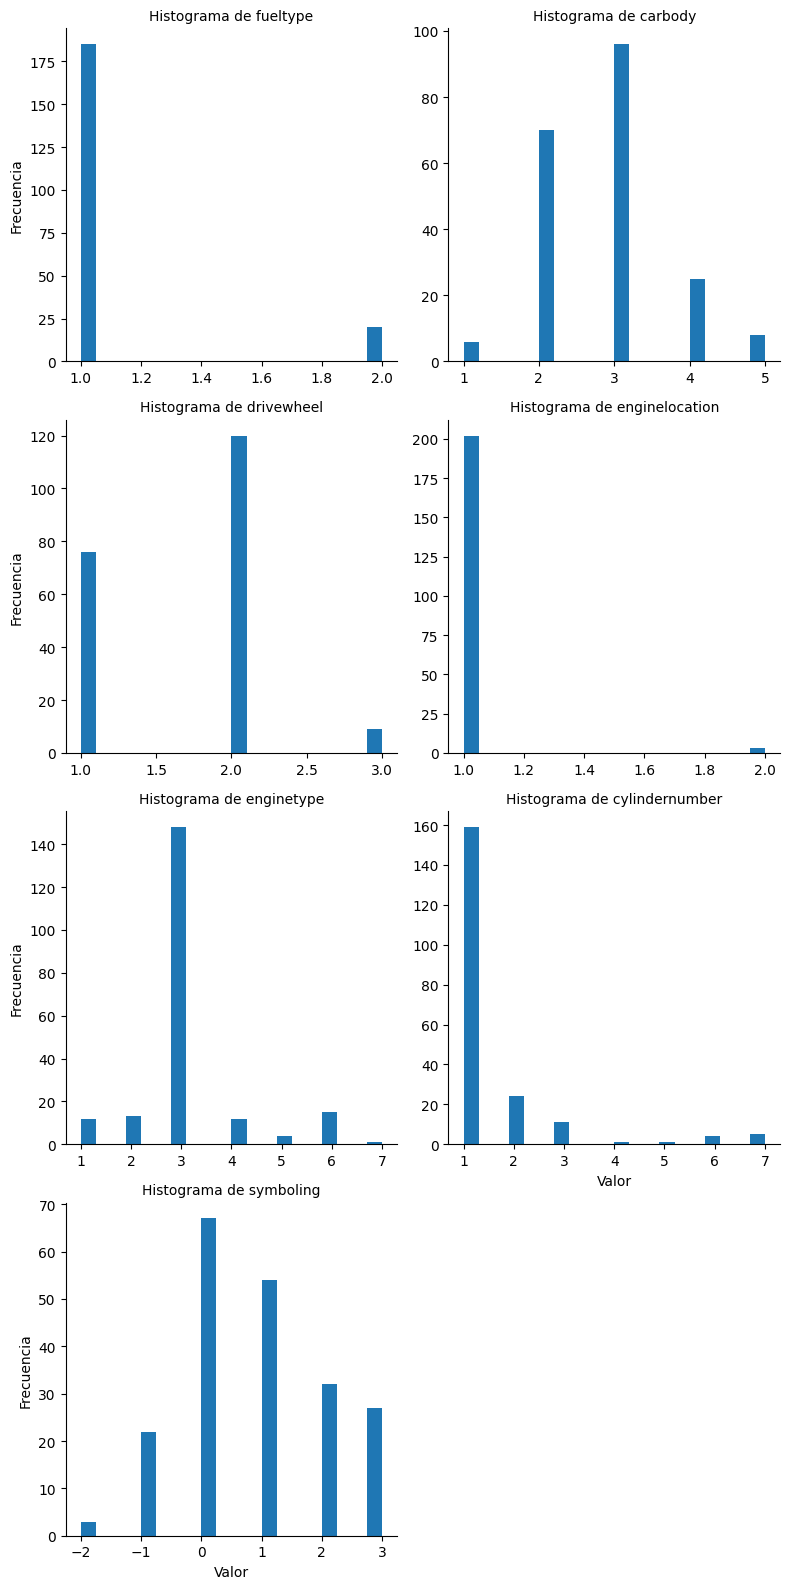

In [95]:
# Crear un FacetGrid para histogramas
g = sns.FacetGrid(variables_cualitativas.melt(), col="variable", col_wrap=2, sharex=False, sharey=False, height=4)

# Map histograms to the FacetGrid
# Mapear histogramas al FacetGrid
g.map(plt.hist, "value", bins=20)
g.set_titles(col_template="Histograma de {col_name}")
g.set_axis_labels("Valor", "Frecuencia")

# Ajustar layout y mostrar gráficas
plt.tight_layout()
plt.show()

In [96]:
mapping_df

,Column,Original_Value,Mapped_Value
0,fueltype,gas,1
1,fueltype,diesel,2
2,carbody,convertible,1
3,carbody,hatchback,2
4,carbody,sedan,3
5,carbody,wagon,4
6,carbody,hardtop,5
7,drivewheel,rwd,1
8,drivewheel,fwd,2
9,drivewheel,4wd,3


##### 1.2.2.2 Análisis de colinealidad
Aprovechando que los valores de las variables cualitativas se transformaron en valores numéricos se realiza un mapa de calor para analizar la correlación que tiene cada variable con el precio. Como se puede observar, algunas variables poseen una correlación moderada con el precio; sin embargo, no se tomaran en cuenta debido a que su correlación no supera a las anteriores. También se realizan diagramas de dispersión para verificar la correlación establecida en el mapa.

<ipython-input-97-1ecbd760aa58>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = autos_df.corr()
<ipython-input-97-1ecbd760aa58>:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr_matrix, dtype=np.bool),


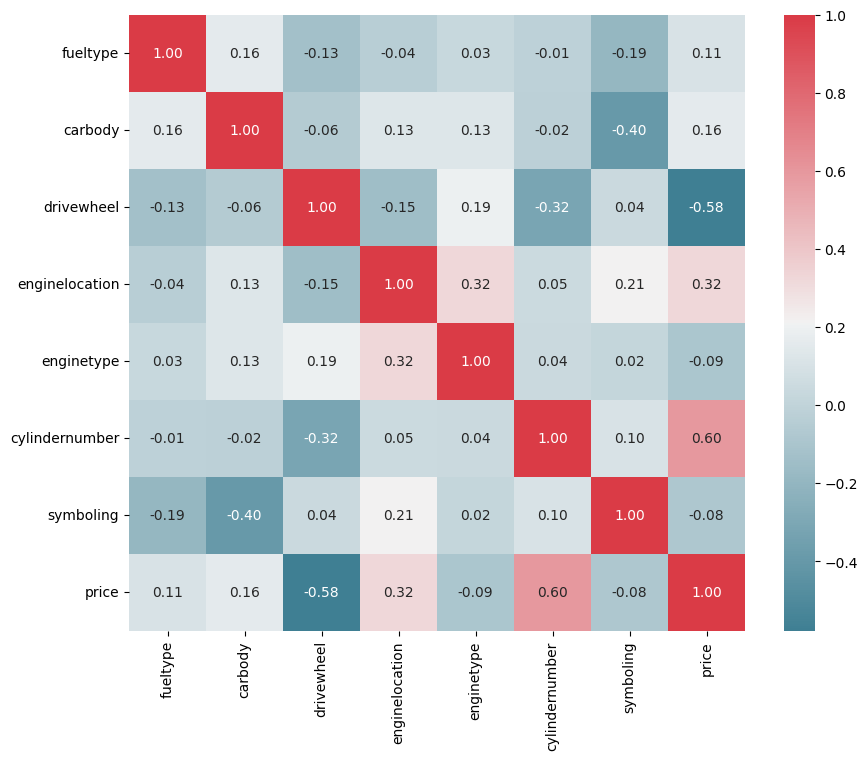

In [97]:
# Extract the column you want to add from df2
column_to_add = autos_df['price']

# Concatenate df1 and the extracted column
combined_df = pd.concat([variables_cualitativas, column_to_add], axis=1)

# Coeficiente de correlación
heatmap_data = combined_df
corr_matrix = heatmap_data.corr()

f, ax = plt.subplots(figsize=(10, 8))
corr = autos_df.corr()

sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            mask=np.zeros_like(corr_matrix, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

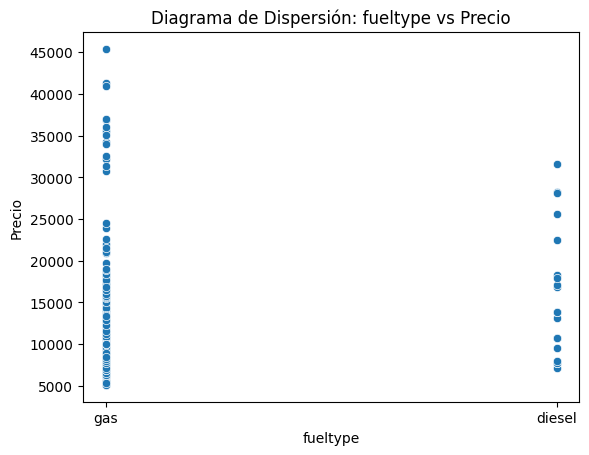

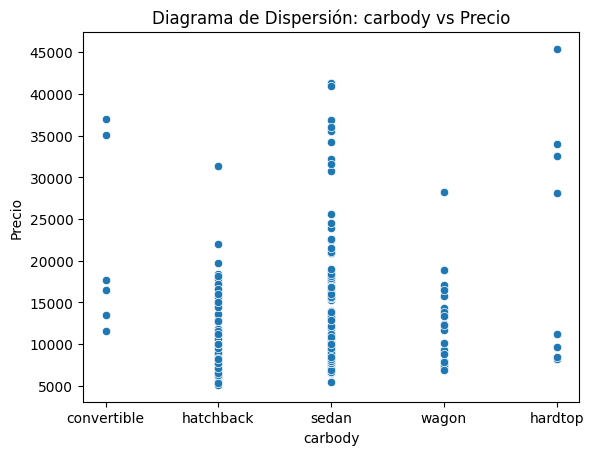

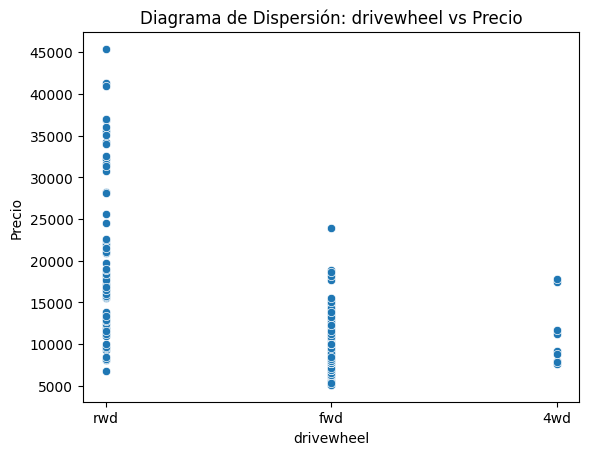

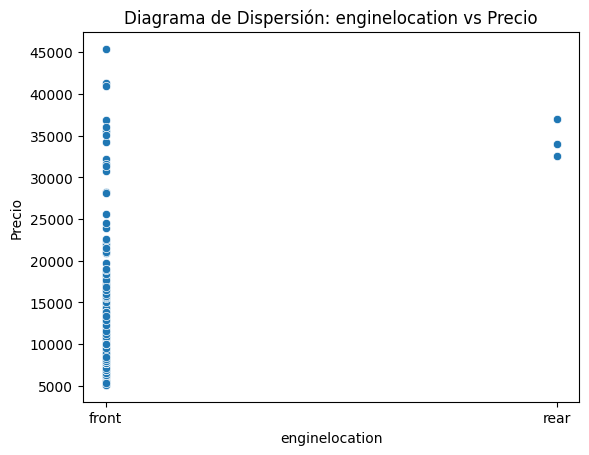

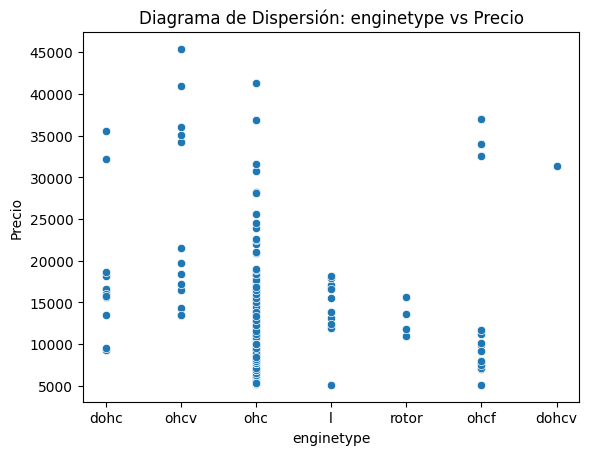

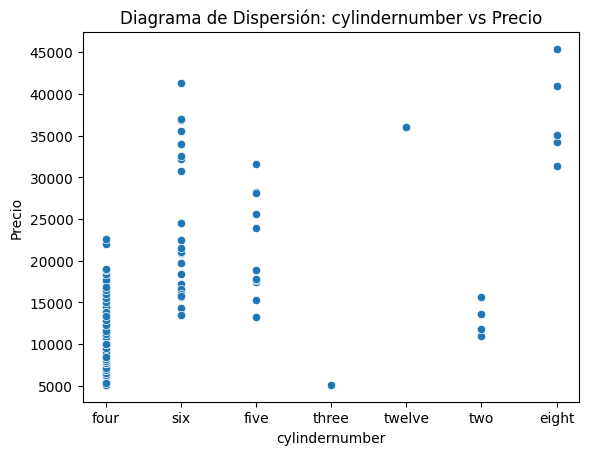

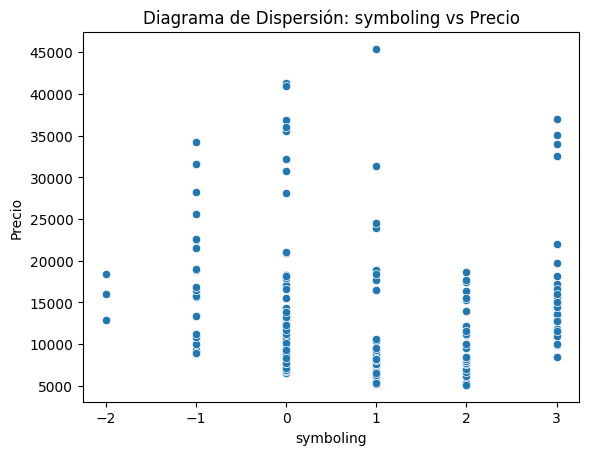

In [98]:
# Diagramas de dispersión
for columna in variables_cualitativas:
    sns.scatterplot(data=autos_df, x=columna, y='price')
    plt.title(f'Diagrama de Dispersión: {columna} vs Precio')
    plt.xlabel(columna)
    plt.ylabel('Precio')
    plt.show()

### 1.3 Identificación de problemas de calidad de datos

Por medio de la función **info** se peude observar que en el dataframe general del conjunto de datos se tiene la misma cantidad de datos para cada variable y no hay valores nulos. Por lo tanto, no hay problemas en cuanto a la calidad de los datos.

Nota: Más adelante se gestionan los registros que tienen valores atípicos de ciertas variables cuantitativas.

In [99]:
autos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  stroke            205 non-null    float64
 15  compressionratio  205 non-null    float64
 16  horsepower        205 non-null    int64  
 1

### 1.4 Selección de variables

Habiendo analizado las variables cuantitativas y cualitativas se cree que las variables más importantes si se quiere predecir el precio son las siguientes:
1. enginesize
2. curbweight
3. horsepower
4. carwidth
5. highwaympg
6. citympg

## **2. Preparación de la base de datos**

### 2.1 Seleción del conjunto de datos

#### 2.1.1 Gestión de datos categóricos

Ahora que ya terminamos de analizar las variables por separado las combinamos en un solo dataframe.

**Nota:** La gestión de los datos categóricos se llevo a cabo en pasos anteriores. Se transformaron los valores tipo objeto a valores numéricos para realizar un análisis más limpio.

In [100]:
# Concatenar DataFrames a lo largo de las filas
autos_combined_df = pd.concat([variables_cuantitativas, variables_cualitativas], axis=0)

# Concatenar DataFrames a lo largo de las columnas
autos_combined_df = pd.concat([variables_cuantitativas, variables_cualitativas], axis=1)
autos_combined_df

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype,carbody,drivewheel,enginelocation,enginetype,cylindernumber,symboling
0,88.6,168.8,64.1,48.8,2548,130,2.68,9.0,111,5000,21,27,13495.0,1,1,1,1,1,1,3
1,88.6,168.8,64.1,48.8,2548,130,2.68,9.0,111,5000,21,27,16500.0,1,1,1,1,1,1,3
2,94.5,171.2,65.5,52.4,2823,152,3.47,9.0,154,5000,19,26,16500.0,1,2,1,1,2,2,1
3,99.8,176.6,66.2,54.3,2337,109,3.40,10.0,102,5500,24,30,13950.0,1,3,2,1,3,1,2
4,99.4,176.6,66.4,54.3,2824,136,3.40,8.0,115,5500,18,22,17450.0,1,3,3,1,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.15,9.5,114,5400,23,28,16845.0,1,3,1,1,3,1,-1
201,109.1,188.8,68.8,55.5,3049,141,3.15,8.7,160,5300,19,25,19045.0,1,3,1,1,3,1,-1
202,109.1,188.8,68.9,55.5,3012,173,2.87,8.8,134,5500,18,23,21485.0,1,3,1,1,2,2,-1
203,109.1,188.8,68.9,55.5,3217,145,3.40,23.0,106,4800,26,27,22470.0,2,3,1,1,3,2,-1


#### 2.1.2 Gestión de datos atípicos
Como ya habíamos identificado los datos atípicos para las variables cuantitativas ahora borrarmos los registros que contengan estos datos atípicos en el dataframe general.

In [104]:
# Crear una máscara booleana para los registros que no son atípicos
non_outliers_mask = ~outliers.any(axis=1)  # Check if any variable has an outlier in the row

# Filtrar los registros no atípicos y crear un nuevo DataFrame
combined_dataframe_without_outliers = autos_combined_df[non_outliers_mask]

# Imprimir el nuevo DataFrame sin los registros atípicos
print(len(combined_dataframe_without_outliers))

139


### 2.2 Transformación de datos

#### 2.2.1 Discretización de los datos
Por el momento no se ha llegado a una desición de si distretizar los datos o no.

#### 2.2.2 Escalamiento y normalización de los datos
Por le momento no se sabe si es conveniente o no realizar el escalamiento y normalización de los datos.